## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
detail_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
detail_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1888,m601,Capomulin,Male,22,17,25,33.118756,1
1889,m601,Capomulin,Male,22,17,30,31.758275,1
1890,m601,Capomulin,Male,22,17,35,30.834357,1
1891,m601,Capomulin,Male,22,17,40,31.378045,1


In [3]:
# Checking the number of mice.
num_mice = len(detail_results["Mouse ID"].unique())
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
count_mice_time = pd.DataFrame(detail_results[["Mouse ID","Timepoint"]].value_counts()).reset_index()
duplicate_mice_time = count_mice_time.loc[count_mice_time[0] > 1, :]
duplicate_mice_ids = duplicate_mice_time["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = detail_results.loc[detail_results["Mouse ID"] == duplicate_mice_ids[0], :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
860,g989,Propriva,Female,21,26,0,45.000000,0
861,g989,Propriva,Female,21,26,0,45.000000,0
862,g989,Propriva,Female,21,26,5,48.786801,0
863,g989,Propriva,Female,21,26,5,47.570392,0
864,g989,Propriva,Female,21,26,10,51.745156,0
865,g989,Propriva,Female,21,26,10,49.880528,0
866,g989,Propriva,Female,21,26,15,51.325852,1
867,g989,Propriva,Female,21,26,15,53.442020,0
868,g989,Propriva,Female,21,26,20,55.326122,1
869,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = detail_results.loc[detail_results["Mouse ID"] != duplicate_mice_ids[0], :]
clean_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1888,m601,Capomulin,Male,22,17,25,33.118756,1
1889,m601,Capomulin,Male,22,17,30,31.758275,1
1890,m601,Capomulin,Male,22,17,35,30.834357,1
1891,m601,Capomulin,Male,22,17,40,31.378045,1


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_results["Mouse ID"].unique())
num_mice

248

## Summary Statistics

In [8]:
from IPython.core.display import HTML
HTML("<style>.rendered_html th {max-width: 100px;}</style>")

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = clean_results.groupby("Drug Regimen")
summary_stats_df = pd.DataFrame(regimen_group["Drug Regimen"].unique())
summary_stats_df["Mean Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].mean()
summary_stats_df["Median Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].median()
summary_stats_df["Variance Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].var()
summary_stats_df["Standard Deviation Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].std()

del summary_stats_df["Drug Regimen"]

for x in range(0,4):
    summary_stats_df.iloc[:,x] = summary_stats_df.iloc[:,x].map("{:.2f}".format)
    
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume
Drug Regimen,,,,
Capomulin,40.68,41.56,24.95,4.99
Ceftamin,52.59,51.78,39.29,6.27
Infubinol,52.88,51.82,43.13,6.57
Ketapril,55.24,53.70,68.55,8.28
Naftisol,54.33,52.51,66.17,8.13
Placebo,54.03,52.29,61.17,7.82
Propriva,52.32,50.45,43.85,6.62
Ramicane,40.22,40.67,23.49,4.85
Stelasyn,54.23,52.43,59.45,7.71


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
simple_summary_stats_df = regimen_group["Tumor Volume (mm3)"].agg(["mean","median","var","std"]) \
                        .rename(columns={"mean": "Mean Tumor Volume", 
                                         "median": "Median Tumor Volume", 
                                         "var": "Variance Tumor Volume", 
                                         "std": "Standard Deviation Tumor Volume"})
for x in range(0,4):
    simple_summary_stats_df.iloc[:,x] = simple_summary_stats_df.iloc[:,x].map("{:.2f}".format)

simple_summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume
Drug Regimen,,,,
Capomulin,40.68,41.56,24.95,4.99
Ceftamin,52.59,51.78,39.29,6.27
Infubinol,52.88,51.82,43.13,6.57
Ketapril,55.24,53.70,68.55,8.28
Naftisol,54.33,52.51,66.17,8.13
Placebo,54.03,52.29,61.17,7.82
Propriva,52.32,50.45,43.85,6.62
Ramicane,40.22,40.67,23.49,4.85
Stelasyn,54.23,52.43,59.45,7.71


## Bar and Pie Charts

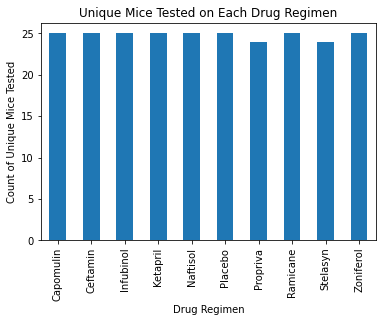

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice_counts = regimen_group["Mouse ID"].unique().str.len()
unique_mice_bar = unique_mice_counts.plot.bar(ylabel="Count of Unique Mice Tested",title="Unique Mice Tested on Each Drug Regimen")
plt.show()

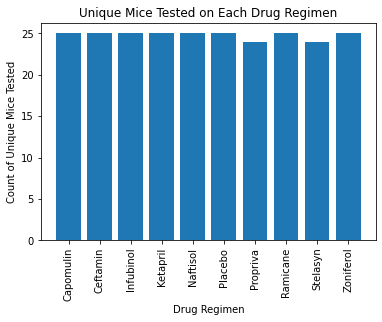

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = [x for x in clean_results["Drug Regimen"].sort_values().unique()]
plt.bar(x_axis, unique_mice_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Unique Mice Tested")
plt.title("Unique Mice Tested on Each Drug Regimen")
plt.xticks(rotation=90)
plt.show()

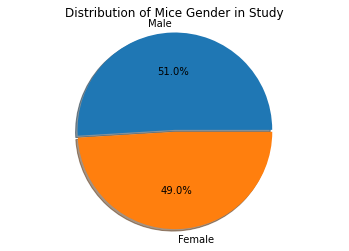

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_results["Sex"].value_counts()

mice_gender_pie = mice_gender.plot.pie(explode=[.01,.01], title="Distribution of Mice Gender in Study", shadow=True, autopct="%1.1f%%",ylabel="")
mice_gender_pie.axis('equal')
plt.show()

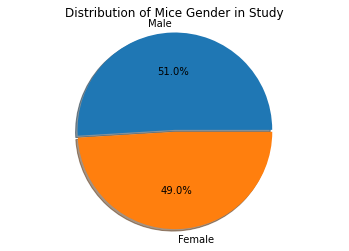

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(mice_gender, explode=[.01,.01], shadow=True, autopct="%1.1f%%", labels=labels)
plt.axis("equal")
plt.title("Distribution of Mice Gender in Study")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_mouse_time = clean_results[["Mouse ID", "Timepoint"]].groupby("Mouse ID")["Timepoint"].max()
last_mouse_time = pd.DataFrame(last_mouse_time)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_last_time = pd.merge(clean_results, last_mouse_time, how="inner", on=["Mouse ID","Timepoint"])
data_last_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,35,71.905117,0
3,a457,Ketapril,Female,11,30,10,49.783419,0
4,c819,Ketapril,Male,21,25,40,62.175705,1
...,...,...,...,...,...,...,...,...
243,t565,Capomulin,Female,20,17,45,34.455298,0
244,i557,Capomulin,Female,1,24,45,47.685963,1
245,m957,Capomulin,Female,3,19,45,33.329098,1
246,f966,Capomulin,Male,16,17,20,30.485985,0


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_data = data_last_time.loc[data_last_time["Drug Regimen"] == treatment, ["Tumor Volume (mm3)"]]
    tumor_vol.append(tumor_data.values.flatten())
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    Q1 = tumor_data.quantile(.25)
    Q3 = tumor_data.quantile(.75)
    IQR = Q3 - Q1
    upperbound = Q3 + 1.5 * IQR
    lowerbound = Q1 - 1.5 * IQR

    outliers = tumor_data.loc[(tumor_data["Tumor Volume (mm3)"] < lowerbound[0]) | (tumor_data["Tumor Volume (mm3)"] > upperbound[0]),:]
    
    if outliers.empty:
        print(f"{treatment} has no outliers.")
    else:
        print(f"{treatment} Outliers:\n{outliers.values.flatten()}")

Capomulin has no outliers.
Ramicane has no outliers.
Infubinol Outliers:
[36.3213458]
Ceftamin has no outliers.


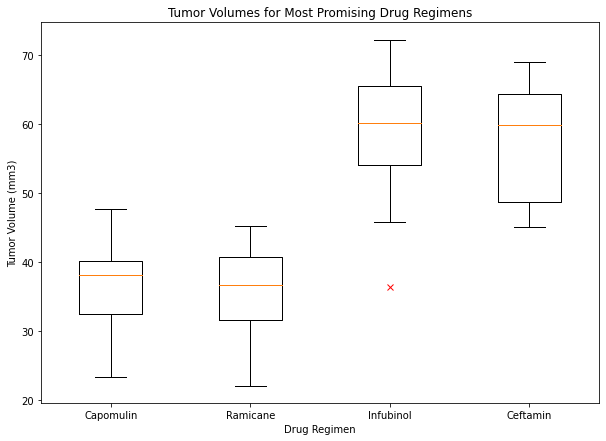

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize=(10,7))

tumor_vol_bp = ax.boxplot(tumor_vol, sym="rx")
ax.set_xticklabels(treatments)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Volumes for Most Promising Drug Regimens")
plt.show()

## Line and Scatter Plots

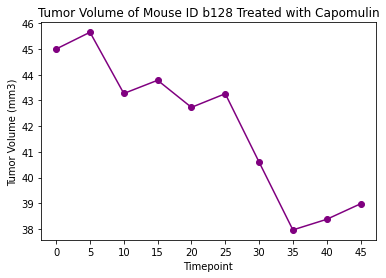

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoint = [x for x in range(0,50,5)]
cap_mouse_b128 = clean_results.loc[clean_results["Mouse ID"]=="b128",["Tumor Volume (mm3)", "Timepoint"]].set_index("Timepoint",drop=True)
plt.plot(timepoint, cap_mouse_b128, marker="o", color="purple")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Mouse ID b128 Treated with Capomulin")
plt.xticks(timepoint)
plt.show()

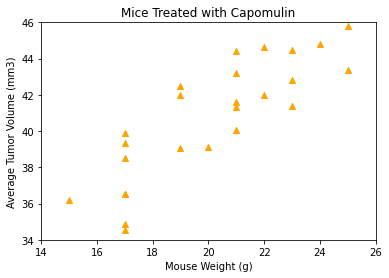

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_regimen = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin",:].groupby("Mouse ID")
weights = cap_regimen["Weight (g)"].mean()
avg_tumor_vol = cap_regimen["Tumor Volume (mm3)"].mean()
plt.scatter(weights, avg_tumor_vol, marker="^", color="orange")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice Treated with Capomulin")
plt.xlim([14,26])
plt.ylim([34,46])
plt.show()

## Correlation and Regression

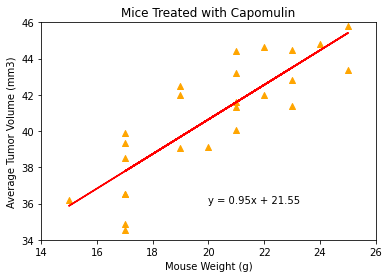

The correlation coefficient is 0.84. This is a strong, positive correlation.


In [89]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, avg_tumor_vol)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weights, avg_tumor_vol, marker="^", color="orange")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice Treated with Capomulin")
plt.xlim([14,26])
plt.ylim([34,46])
plt.plot(weights, regress_values, "r-")
plt.annotate(line_eq, (20,36))
plt.show()

correlation, p = st.pearsonr(weights, avg_tumor_vol)
print(f"The correlation coefficient is {round(correlation,2)}. This is a strong, positive correlation.")